## Data collection

In [1]:
import os
import json
import time
import logging
import urllib.request
import urllib.error
from urllib.parse import urlparse
import numpy as np
import pandas as pd 

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [3]:
# user_agent for generating random, valid web user agent and selenium for automated web browser interaction
from multiprocessing import Pool
from user_agent import generate_user_agent
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [ ]:
def get_image_links(main_keyword, supplemented_keywords, link_file_path, num_requested=1000):
    number_of_scrolls= int(num_requested / 400) + 1
    img_urls = set()
    driver = webdriver.Firefox
    for i in range (len(supplemented_keywords)):
        search_query= main_keyword + ' '+ supplemented_keywords[i]
        url= "https://www.google.com/search?q=" + search_query + "&source=lnms&tbm=isch"
        driver.get(url)
        
        for _ in range (number_of_scrolls):
            for _ in range(10):
                # multiple scrolls needed to display all 400 images
                driver.execute_script("window.scrollBy(0, 1000000)")
                time.sleep(2)
            #To load next 400 images
            time.sleep(5)
            try:
                driver.find_element_by_xpath("//input[@value='Show more results']").click()
            except Exception as e:
                print ("Process-{0} reach the end of page or get the maximum number of requested images").format(main_keyword)
                break
        # images = driver.find_elements_by_xpath ('//div[@class="rg_meta"]') #not working anymore
        imges= driver.find_elements_by_xpath('//div[contains(@class,"rg_meta")]')
        for img in imges:
            img_url = json.loads(img.get_attribute ('innerHTML'))["ou"]
            # img_type = json.loads(img.get_attribute('innerHTML'))["ity"]
            img_urls.add(img_url)
        print('Process-{0} add keyword {1} , got {2} image urls so far'.format(main_keyword, supplemented_keywords[i], len(img_urls)))
    print('Process-{0} totally get {1} images'.format(main_keyword, len(img_urls)))
    driver.quit()

    with open(link_file_path, 'w') as wf:
        for url in img_urls:
            wf.write(url +'\n')
    print('Store all the links in file {0}'.format(link_file_path))



In [ ]:
def download_images(link_file_path, download_dir, log_dir):

    print('Start downloading with link file {0}..........'.format(link_file_path))
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
    main_keyword = link_file_path.split('/')[-1]
    log_file = log_dir + 'download_selenium_{0}.log'.format(main_keyword)
    logging.basicConfig(level=logging.DEBUG, filename=log_file, filemode="a+", format="%(asctime)-15s %(levelname)-8s  %(message)s")
    img_dir = download_dir + main_keyword + '/'
    count = 0
    headers = {}
    if not os.path.exists(img_dir):
        os.makedirs(img_dir)
    # start to download images
    with open(link_file_path, 'r') as rf:
        for link in rf:
            try:
                o = urlparse(link)
                ref = o.scheme + '://' + o.hostname
                #ref = 'https://www.google.com'
                ua = generate_user_agent()
                headers['User-Agent'] = ua
                headers['referer'] = ref
                print('\n{0}\n{1}\n{2}'.format(link.strip(), ref, ua))
                req = urllib.request.Request(link.strip(), headers = headers)
                response = urllib.request.urlopen(req, timeout = 30)
                data = response.read()
                file_path = img_dir + '{0}.jpg'.format(count)
                with open(file_path,'wb') as wf:
                    wf.write(data)
                print('Process-{0} download image {1}/{2}.jpg'.format(main_keyword, main_keyword, count))
                count += 1
                if count % 10 == 0:
                    print('Process-{0} is sleeping'.format(main_keyword))
                    time.sleep(5)

            except urllib.error.URLError as e:
                print('URLError')
                logging.error('URLError while downloading image {0}reason:{1}'.format(link, e.reason))
                continue
            except urllib.error.HTTPError as e:
                print('HTTPError')
                logging.error('HTTPError while downloading image {0}http code {1}, reason:{2}'.format(link, e.code, e.reason))
                continue
            except Exception as e:
                print('Unexpected Error')
                logging.error('Unexpeted error while downloading image {0}error type:{1}, args:{2}'.format(link, type(e), e.args))
                continue


if __name__ == "__main__":

    main_keywords = ['rabbit', 'donkey']
    supplemented_keywords = ['']

    download_dir = 'imgs/'
    link_files_dir = 'link_files/'
    log_dir = 'logs/'

    max_pic_num = 2000

    # multiple processes
    p = Pool(1) # default number of process is the number of cores of your CPU, change it by yourself
    for keyword in main_keywords:
        p.apply_async(get_image_links, args=(keyword, supplemented_keywords, link_files_dir + keyword, max_pic_num))
    p.close()
    p.join()
    print('Fininsh getting all image links')
        

    p = Pool() # default number of process is the number of cores of your CPU, change it by yourself
    for keyword in main_keywords:
        p.apply_async(download_images, args=(link_files_dir + keyword, download_dir, log_dir))
    p.close()
    p.join()
    print('Finish downloading all images')

In [13]:
%run Img_collect.py

Fininsh getting all image links
Finish downloading all images


In [25]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"domestic rabbit","limit":50,"image_directory":"rabbit","format":"jpg"}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


Item no.: 1 --> Item name = domestic rabbit
Evaluating...
Starting Download...
Completed Image ====> 1.Ufenau_-_Oryctolagus_cuniculus_2011-07-25_17-33-40.jpg
Completed Image ====> 2.EnglishSpotRabbitChocolate1%28cropped%29.jpg
Completed Image ====> 3.maxresdefault.jpg
Completed Image ====> 4.man-holding-angora-rabbit_319489811_0.jpg
Completed Image ====> 5.ebjj1g.jpg
Completed Image ====> 6.Rabbit_iStock-152171561_16x9.jpg
Completed Image ====> 7.rabbit_0.jpg
Completed Image ====> 8.fotolia_5832038_XS.jpg
Completed Image ====> 9.rabbit-475261_0.jpg
Completed Image ====> 10.DSC_7215.jpg
Completed Image ====> 11.6-popular-bunnies-netherlands-polish-566761045.jpg
Completed Image ====> 12.Cottontail-domestic-bunny-MacGruber-5939.jpg
Wrong image format returned. Skipping...
Completed Image ====> 13.rabbits-235417.jpg
Completed Image ====> 14.lop-earred-rabbit.jpg
Completed Image ====> 15.How-long-do-pet-rabbits-live-1.jpg
Completed Image ====> 16.A6A1298.jpg
Completed Image ====> 17.rabbit

## Load data

### Define configs

In [4]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [20]:
#Donkey is 0 and rabbit is 1
file_donkey = os.listdir("downloads/donkey")
file_rabbit = os.listdir("downloads/rabbit")

categories=[0]*len(file_donkey)+[1]*len(file_rabbit)

'''
i=1
for file in file_donkey:
    src="downloads/donkey/"+str(file)
    dst="downloads/donkey/"+"donkey_"+str(i)+".jpg"
    os.rename(src, dst)
    i+=1

i=1
for file in file_rabbit:
    src="downloads/rabbit/"+str(file)
    dst="downloads/rabbit/"+"rabbit_"+str(i)+".jpg"
    os.rename(src, dst)
    i+=1
'''


'\ni=1\nfor file in file_donkey:\n    src="downloads/donkey/"+str(file)\n    dst="downloads/donkey/"+"donkey_"+str(i)+".jpg"\n    os.rename(src, dst)\n    i+=1\n\ni=1\nfor file in file_rabbit:\n    src="downloads/rabbit/"+str(file)\n    dst="downloads/rabbit/"+"rabbit_"+str(i)+".jpg"\n    os.rename(src, dst)\n    i+=1\n'

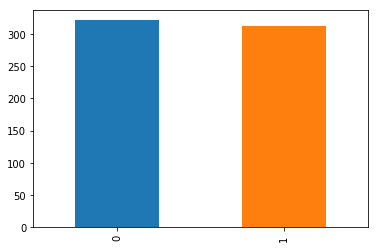

In [21]:
file_donkey = os.listdir("downloads/donkey")
file_rabbit = os.listdir("downloads/rabbit")
df = pd.DataFrame({
    'filename': file_donkey+file_rabbit,
    'category': categories
    })
df['category'].value_counts().plot.bar()

rabbit_104.jpg 1


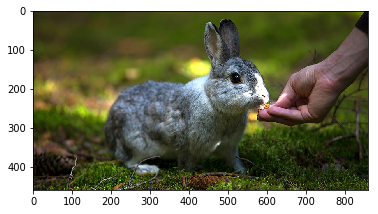

In [22]:
sample=df.sample(1)
if sample['category'].values[0]==0:
    image=load_img("downloads/donkey/"+sample['filename'].values[0])
else:
    image=load_img("downloads/rabbit/"+sample['filename'].values[0])
print (sample['filename'].values[0], sample['category'].values[0])
plt.imshow(image)

## Build CNN from Keras

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [24]:
# 3 convolutional layers followed by fully connected output layer
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [26]:
earlystop = EarlyStopping(patience=10)

In [27]:
#reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

## Data preprocess

In [28]:
pd.set_option('display.max_colwidth', 100)

df["file_path"]=np.where(df["category"]==0, "D:/udacity-git-course/Machine_learning/CNN/downloads/donkey/", "D:/udacity-git-course/Machine_learning/CNN/downloads/rabbit/")
df["file_path"]+=df["filename"]
df["category"] = df["category"].replace({0: 'donkey', 1: 'rabbit'}) 
df.tail()

,filename,category,file_path
629,rabbit_95.jpg,rabbit,D:/udacity-git-course/Machine_learning/CNN/downloads/rabbit/rabbit_95.jpg
630,rabbit_96.jpg,rabbit,D:/udacity-git-course/Machine_learning/CNN/downloads/rabbit/rabbit_96.jpg
631,rabbit_97.jpg,rabbit,D:/udacity-git-course/Machine_learning/CNN/downloads/rabbit/rabbit_97.jpg
632,rabbit_98.jpg,rabbit,D:/udacity-git-course/Machine_learning/CNN/downloads/rabbit/rabbit_98.jpg
633,rabbit_99.jpg,rabbit,D:/udacity-git-course/Machine_learning/CNN/downloads/rabbit/rabbit_99.jpg


In [29]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=1111)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
train_df['category'].describe()

count        507
unique         2
top       rabbit
freq         255
Name: category, dtype: object

In [30]:
total_train = train_df.shape[0]
total_valid = valid_df.shape[0]
batch_size=15

In [31]:
# Data augment
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "downloads/imgs/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 492 images belonging to 2 classes.


In [32]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    valid_df, 
     "downloads/imgs/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 125 images belonging to 2 classes.


Found 1 images belonging to 1 classes.


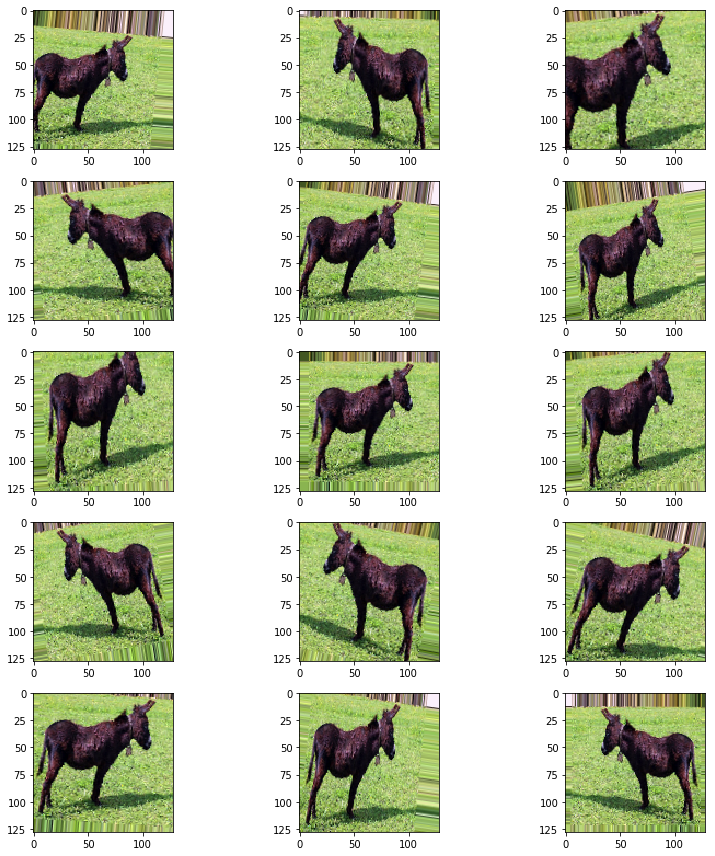

In [33]:
# Example of keras image preprocessor
example_df = train_df.sample(1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    None, 
    x_col='file_path',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Fit model

In [34]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_valid//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
33/33 [==============================] - 62s 2s/step - loss: 1.3125 - acc: 0.6809 - val_loss: 5.3434 - val_acc: 0.4560
Epoch 2/50
33/33 [==============================] - 57s 2s/step - loss: 0.6340 - acc: 0.7581 - val_loss: 2.3470 - val_acc: 0.4560
Epoch 3/50
9/9 [==============================] - 6s 621ms/step - loss: 4.9285 - acc: 0.4560

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 [==============================] - 57s 2s/step - loss: 0.7398 - acc: 0.7297 - val_loss: 4.9285 - val_acc: 0.4560
Epoch 4/50
33/33 [==============================] - 59s 2s/step - loss: 0.6167 - acc: 0.7642 - val_loss: 4.1717 - val_acc: 0.4560
Epoch 5/50
9/9 [==============================] - 5s 611ms/step - loss: 5.4086 - acc: 0.4560

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
33/33 [==============================] - 57s 2s/step - loss: 0.5476 - acc: 0.7846 - val_loss: 5.4086 - val_acc: 0.4560
Epoch 6/50
33/33 [======

In [35]:
model.save_weights("CNN_keras.h5")

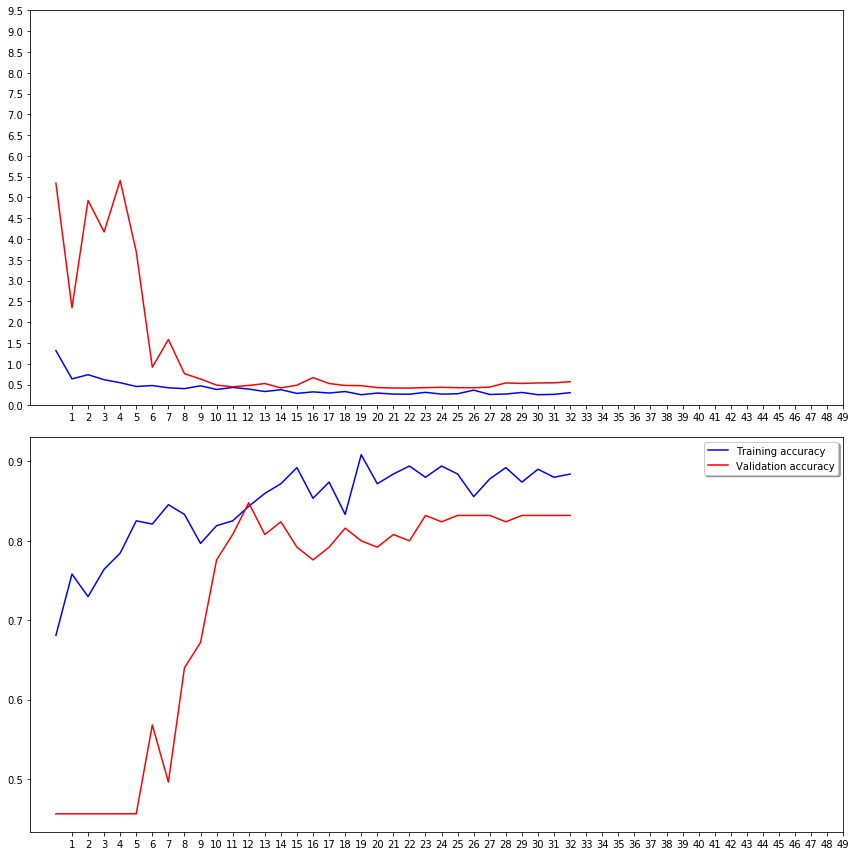

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 10, 0.5))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## CNN with Tensorflow

In [38]:
datas_placeholder = tf.placeholder(tf.float32, [None, 32, 32, 3])
labels_placeholder = tf.placeholder(tf.int32, [None])

# 存放DropOut参数的容器，训练时为0.25，测试时为0
dropout_placeholder = tf.placeholder(tf.float32)

In [43]:
# Define convolution layer, 32 filter, kernel size 3x3, Relu activation

train=True

conv0 = tf.layers.conv2d(datas_placeholder, 32, (3,3), activation=tf.nn.relu)
conv0 = tf.layers.batch_normalization(conv0, training=train)
# max-pooling layer，pooling 2x2，strides 1x1
pool0 = tf.layers.max_pooling2d(conv0, [2, 2], [1, 1])
dropout0=tf.layers.dropout(pool0, rate=0.25)

conv1 = tf.layers.conv2d(pool0, 64, (3,3), activation=tf.nn.relu)
conv1 = tf.layers.batch_normalization(conv1, training=train)
pool1 = tf.layers.max_pooling2d(conv1, [2, 2], [1, 1])
dropout1=tf.layers.dropout(pool1, rate=0.25)

conv2 = tf.layers.conv2d(pool0, 128, (3,3), activation=tf.nn.relu)
conv2 = tf.layers.batch_normalization(conv2, training=train)
pool2 = tf.layers.max_pooling2d(conv1, [2, 2], [1, 1])
dropout2=tf.layers.dropout(pool2, rate=0.25)


Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.dropout instead.


In [ ]:

flatten = tf.layers.flatten(pool2)

# full connection
fc = tf.layers.dense(flatten, 512, activation=tf.nn.relu)

# add DropOut 
dropout_fc = tf.layers.dropout(fc, rate=0.5, dropout_placeholdr)

# 未激活的输出层
logits = tf.layers.dense(dropout_fc, num_classes)

predicted_labels = tf.arg_max(logits, 1)

In [ ]:
losses = tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(labels_placeholder, num_classes),
logits=logits)

mean_loss = tf.reduce_mean(losses)

# optimizer may be adam
optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-2).minimize(losses)

In [ ]:
saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess:

    if train:
        print("On training")
        # Initialize variables
        sess.run(tf.global_variables_initializer())
        
        train_feed_dict = {
            datas_placeholder: datas,
            labels_placeholder: labels
        }
        for step in range(150):
            _, mean_loss_val = sess.run([optimizer, mean_loss], feed_dict=train_feed_dict)

            if step % 10 == 0:
                print("step = {}\tmean loss = {}".format(step, mean_loss_val))
        saver.save(sess, model_path)
        print("Training completed, model saved to{}".format(model_path))
    else:
        print("On test")
        # load parameter
        saver.restore(sess, model_path)
        print("load model from{}".format(model_path))
        # label dict
        label_name_dict = {
            0: "donkey",
            1: "rabbit"
        }
        # test时dropout为0
        test_feed_dict = {
            datas_placeholder: datas,
            labels_placeholder: labels,
            dropout_placeholder: 0
        }
        predicted_labels_val = sess.run(predicted_labels, feed_dict=test_feed_dict)
        # Real label and predicted label
        for fpath, real_label, predicted_label in zip(fpaths, labels, predicted_labels_val):
            # 将label id转换为label名
            real_label_name = label_name_dict[real_label]
            predicted_label_name = label_name_dict[predicted_label]
            print("{}\t{} => {}".format(fpath, real_label_name, predicted_label_name))